In [21]:
import pandas as pd

dataset = pd.read_csv('/content/Reduced_Water_Quality_Prediction.csv')

In [22]:
dataset.shape

(50000, 24)

In [23]:
# Check for typos and ensure column names exist
print(dataset.columns)

# Drop columns (adjust column names if needed based on the output above)
dataset = dataset.drop(dataset.columns[0], axis=1)


Index(['Index', 'pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Color',
       'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity',
       'Chlorine', 'Manganese', 'Total Dissolved Solids', 'Source',
       'Water Temperature', 'Air Temperature', 'Month', 'Day', 'Time of Day',
       'Target'],
      dtype='object')


In [24]:
print(dataset['Target'].value_counts())

Target
0    38601
1    11399
Name: count, dtype: int64


In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pH                      49031 non-null  float64
 1   Iron                    49648 non-null  float64
 2   Nitrate                 49181 non-null  float64
 3   Chloride                48511 non-null  float64
 4   Lead                    49778 non-null  float64
 5   Zinc                    48704 non-null  float64
 6   Color                   49947 non-null  object 
 7   Turbidity               49582 non-null  float64
 8   Fluoride                48397 non-null  float64
 9   Copper                  48270 non-null  float64
 10  Odor                    48462 non-null  float64
 11  Sulfate                 48346 non-null  float64
 12  Conductivity            48606 non-null  float64
 13  Chlorine                49535 non-null  float64
 14  Manganese               49081 non-null

In [26]:
dataset.isnull().sum()

,0
pH,969
Iron,352
Nitrate,819
Chloride,1489
Lead,222
Zinc,1296
Color,53
Turbidity,418
Fluoride,1603
Copper,1730


In [27]:
dataset.isnull().sum()/dataset.shape[0]*100

,0
pH,1.938
Iron,0.704
Nitrate,1.638
Chloride,2.978
Lead,0.444
Zinc,2.592
Color,0.106
Turbidity,0.836
Fluoride,3.206
Copper,3.460


In [28]:
#finding duplicates
dataset.duplicated().sum()

39

In [29]:
dataset.drop_duplicates(inplace=True)
dataset.duplicated().sum()

0

In [30]:
dataset.shape

(49961, 23)

In [31]:
#garbage values
for i in dataset.select_dtypes(include="object").columns:
  print(dataset[i].value_counts())
  print("***"*10)

Color
Colorless         15565
Near Colorless    15416
Faint Yellow       9033
Light Yellow       6004
Yellow             3890
Name: count, dtype: int64
******************************
Source
Ground       6213
Spring       6211
River        6186
Stream       6177
Aquifer      6172
Well         6154
Reservoir    6078
Lake         6005
Name: count, dtype: int64
******************************
Month
March        4261
July         4244
May          4206
August       4198
June         4153
January      4129
October      4099
December     4081
November     4043
September    3979
April        3939
February     3828
Name: count, dtype: int64
******************************


In [32]:
#descriptive statistics
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
pH,48992.0,7.445529,0.850884,2.058008e+00,6.914003e+00,7.445786e+00,7.995955e+00,12.340301
Iron,49609.0,0.114260,0.446527,4.170000e-36,9.370000e-06,2.128406e-03,4.966080e-02,11.845204
Nitrate,49142.0,6.088090,3.137246,5.699518e-01,3.955006e+00,5.569733e+00,7.611383e+00,52.539273
Chloride,48473.0,181.890379,65.623250,3.690368e+01,1.375398e+02,1.745985e+02,2.153864e+02,853.673543
Lead,49739.0,0.001032,0.022508,0.000000e+00,9.975000e-123,2.830000e-62,3.560000e-27,1.718409
Zinc,48665.0,1.529504,1.509525,4.420000e-06,4.124178e-01,1.076107e+00,2.223147e+00,28.368672
Turbidity,49543.0,0.483467,0.876017,5.410000e-13,3.659946e-02,1.990341e-01,5.896350e-01,14.111126
Fluoride,48358.0,0.948900,0.800969,3.910000e-05,3.711451e-01,7.726669e-01,1.328104e+00,12.033250
Copper,48231.0,0.492681,0.565342,1.010000e-06,1.258078e-01,3.379221e-01,6.756102e-01,8.407121
Odor,48423.0,1.773168,1.053023,1.117879e-02,8.723517e-01,1.744932e+00,2.616336e+00,4.141936


In [33]:
dataset.describe(include="object")

,Color,Source,Month
count,49908,49196,49160
unique,5,8,12
top,Colorless,Ground,March
freq,15565,6213,4261


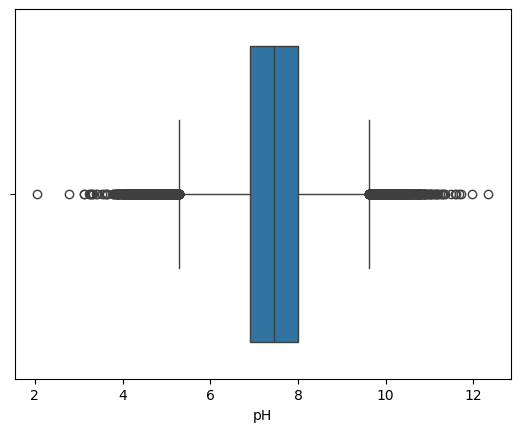

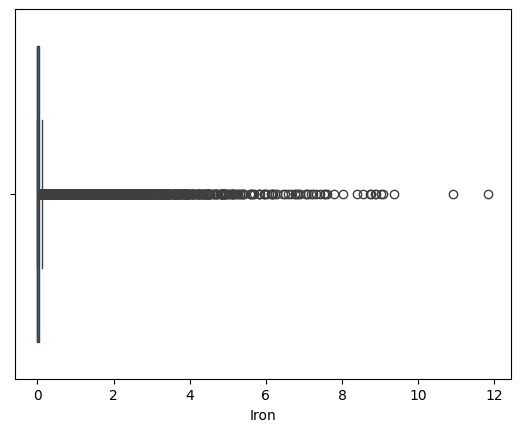

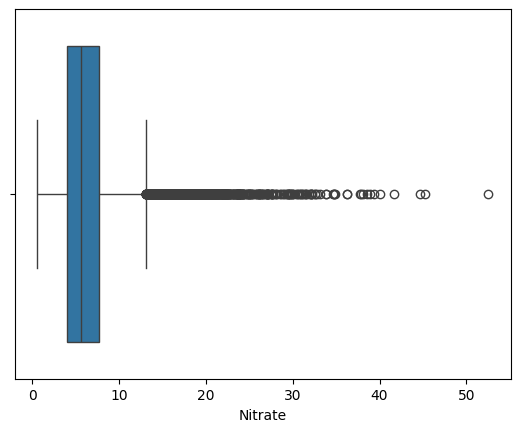

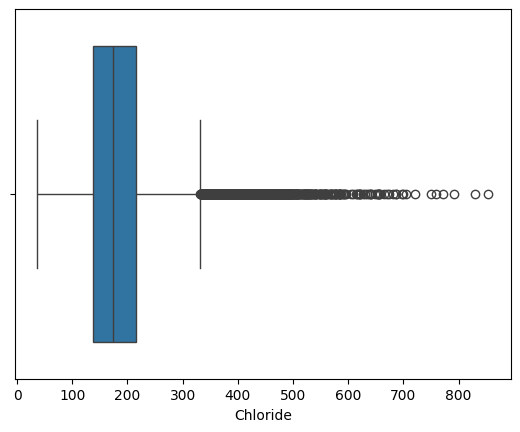

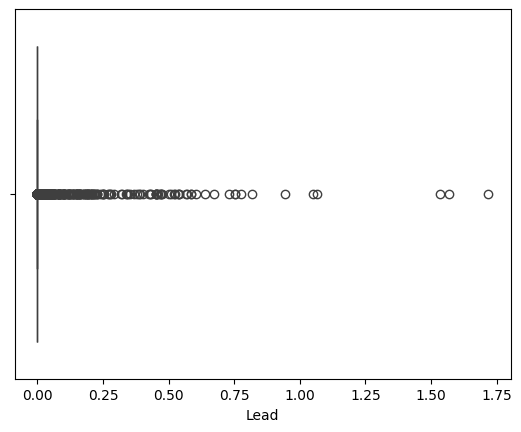

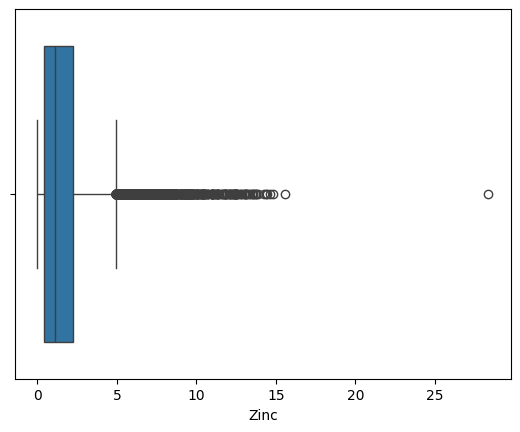

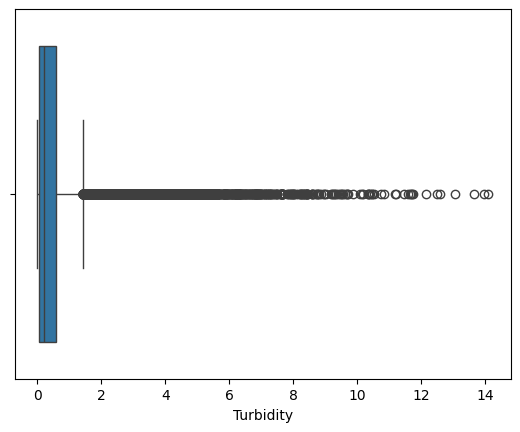

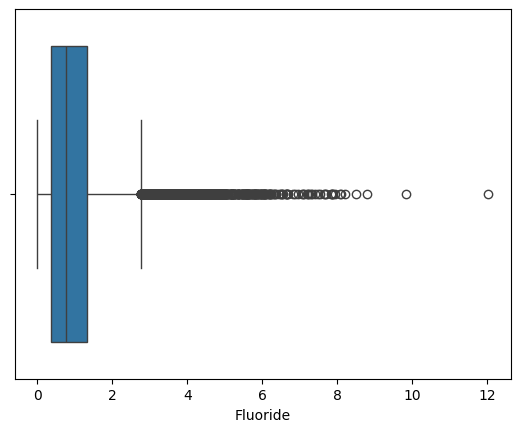

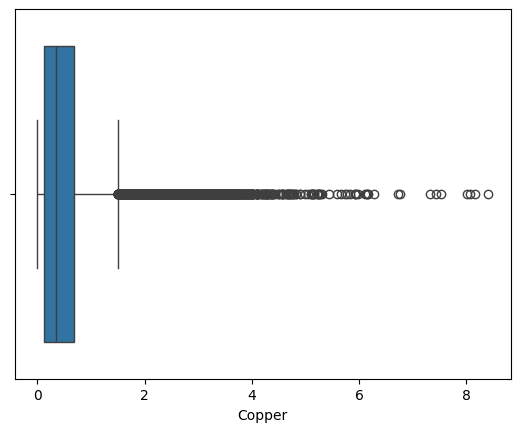

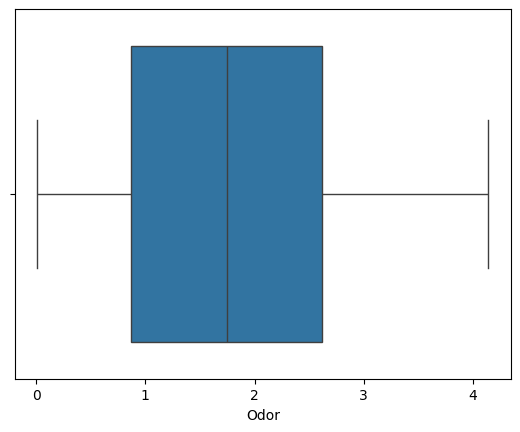

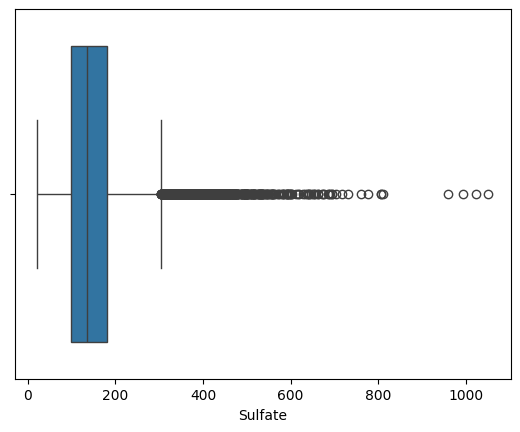

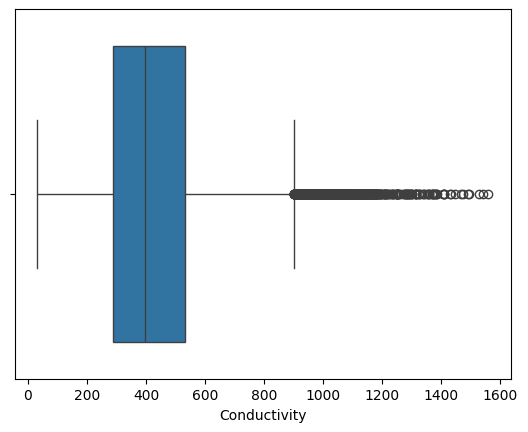

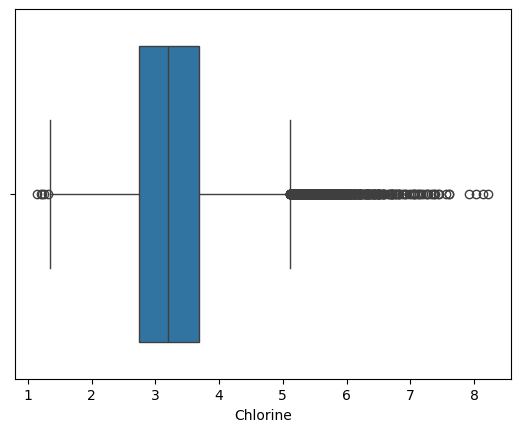

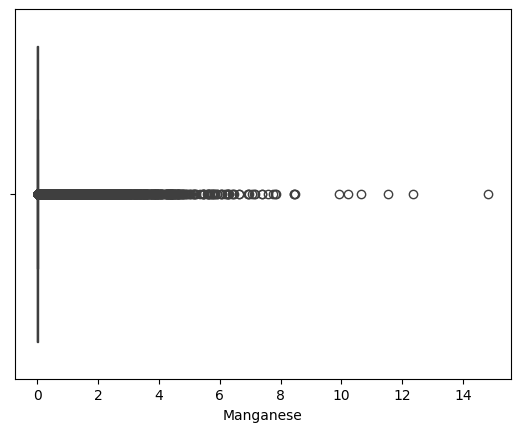

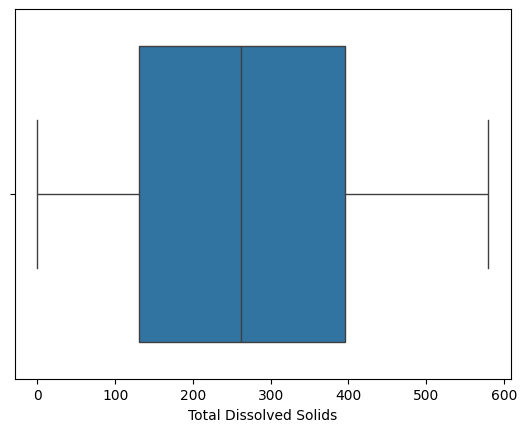

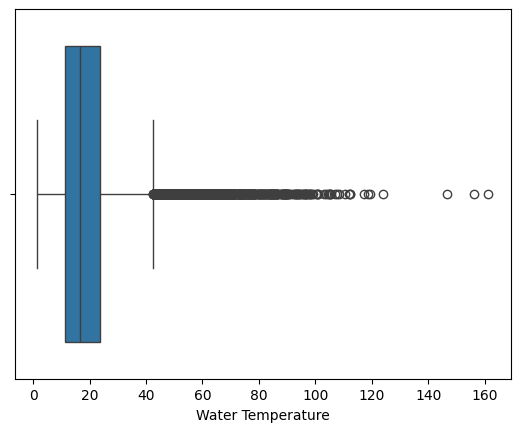

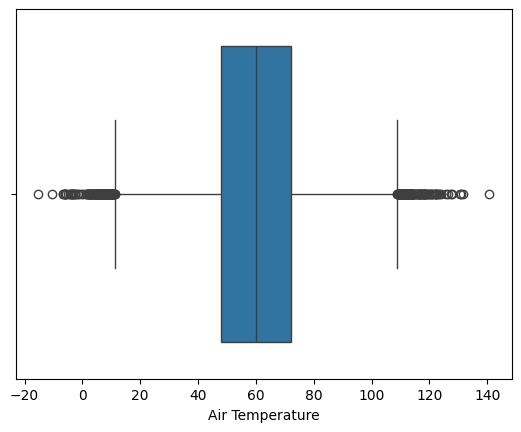

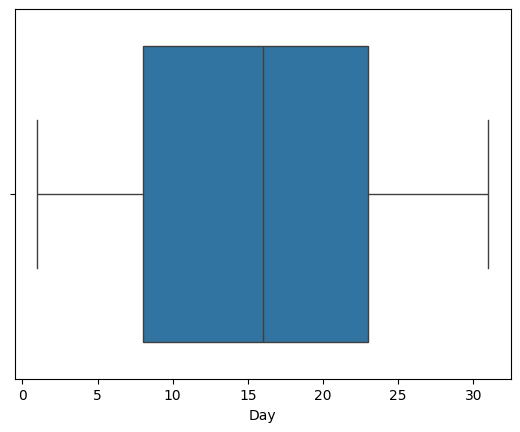

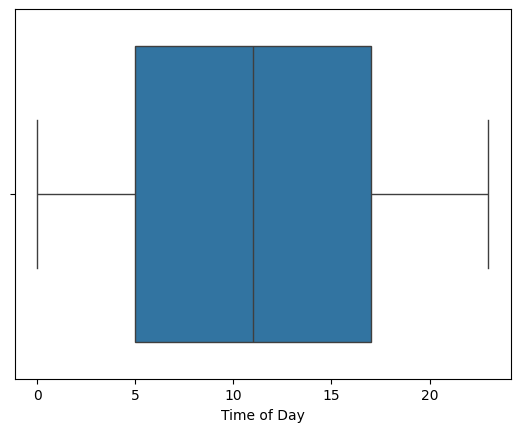

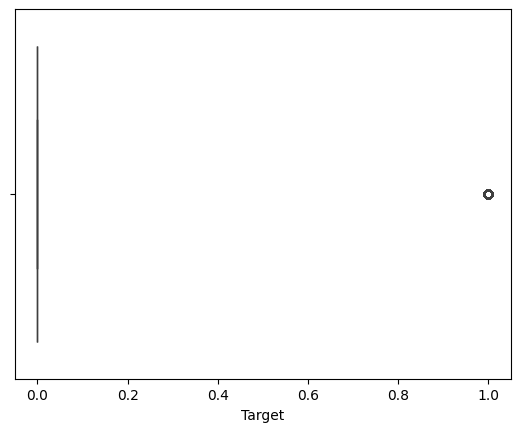

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in dataset.select_dtypes(include="number").columns:
    sns.boxplot(data=dataset,x=i)
    plt.show()

In [35]:
dataset.isnull().sum()  #checking for missing values

,0
pH,969
Iron,352
Nitrate,819
Chloride,1488
Lead,222
Zinc,1296
Color,53
Turbidity,418
Fluoride,1603
Copper,1730


In [36]:
#add mean to missing value (No outliers or less outliers)
dataset['Odor'] = dataset['Odor'].fillna(dataset['Odor'].mean())

In [37]:
dataset['Total Dissolved Solids'] = dataset['Total Dissolved Solids'].fillna(dataset['Total Dissolved Solids'].mean())

In [38]:
dataset['Day'] = dataset['Day'].fillna(dataset['Day'].mean())

In [39]:
dataset['Time of Day'] = dataset['Time of Day'].fillna(dataset['Time of Day'].mean())

In [40]:
dataset.isnull().sum()

,0
pH,969
Iron,352
Nitrate,819
Chloride,1488
Lead,222
Zinc,1296
Color,53
Turbidity,418
Fluoride,1603
Copper,1730


In [41]:
for column in dataset.select_dtypes(include='number').columns:
  if column not in ['Odor', 'Total Dissolved Solids', 'Day', 'Time of Day']:
    dataset[column] = dataset[column].fillna(dataset[column].median())

In [42]:
dataset.isnull().sum()

,0
pH,0
Iron,0
Nitrate,0
Chloride,0
Lead,0
Zinc,0
Color,53
Turbidity,0
Fluoride,0
Copper,0


In [43]:
dataset.isnull().sum()

,0
pH,0
Iron,0
Nitrate,0
Chloride,0
Lead,0
Zinc,0
Color,53
Turbidity,0
Fluoride,0
Copper,0


In [44]:
for column in dataset.select_dtypes(include='object').columns:
  dataset[column] = dataset[column].fillna(dataset[column].mode()[0])

In [45]:
dataset.isnull().sum()

,0
pH,0
Iron,0
Nitrate,0
Chloride,0
Lead,0
Zinc,0
Color,0
Turbidity,0
Fluoride,0
Copper,0


In [46]:
dataset.to_csv('new_dataset.csv', index=False)

In [47]:
from google.colab import files
files.download('new_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

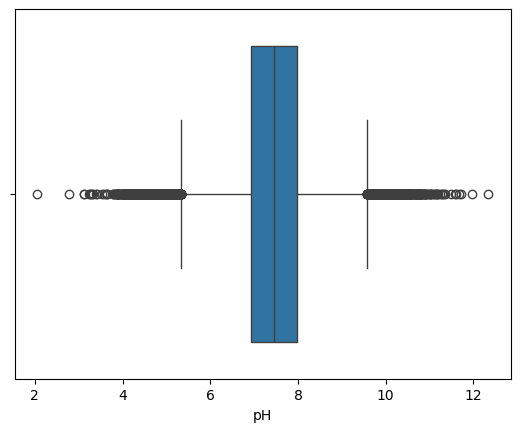

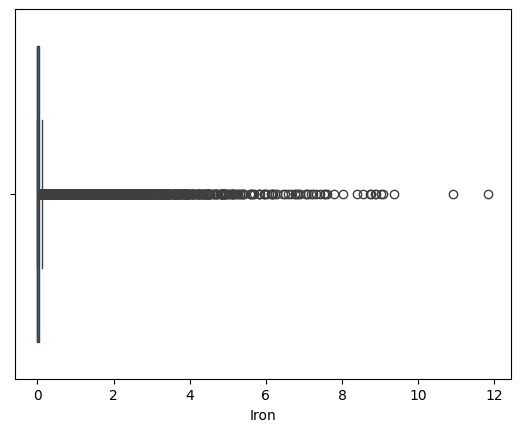

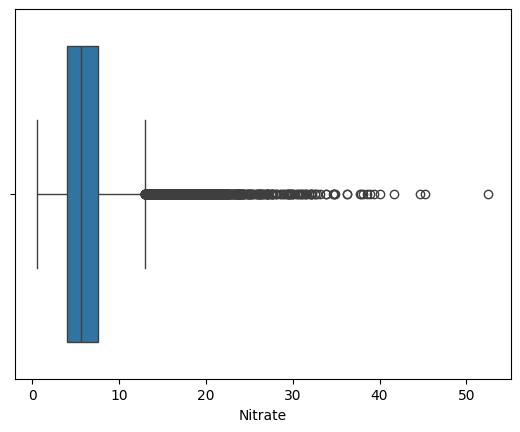

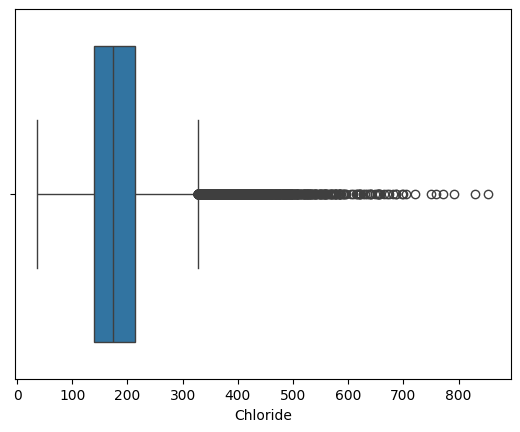

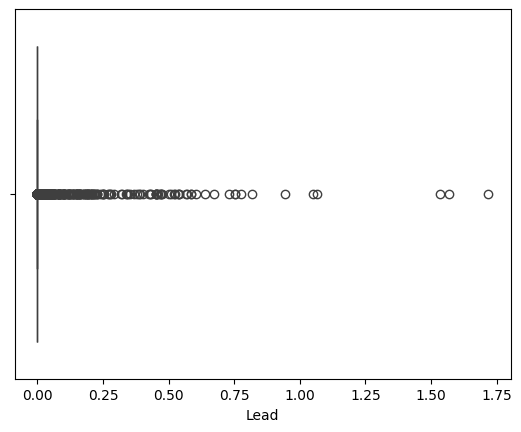

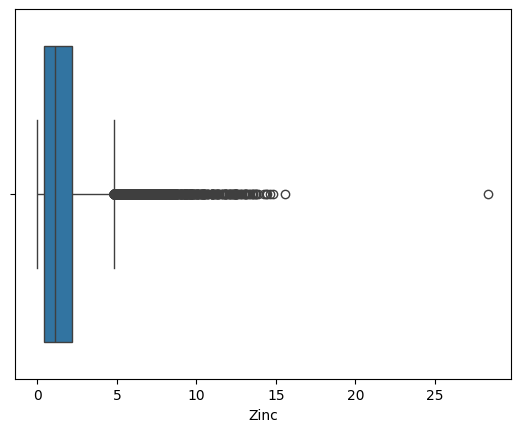

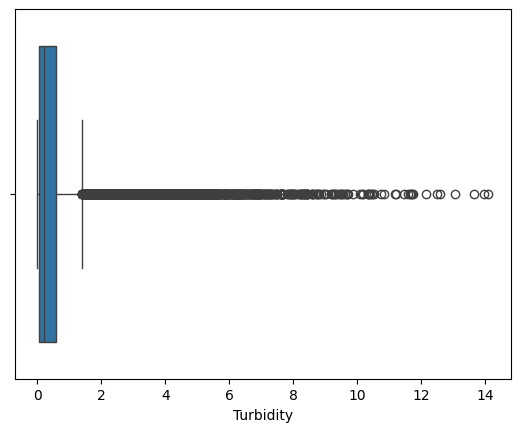

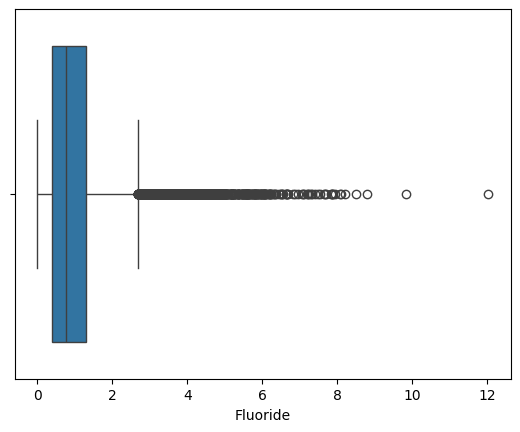

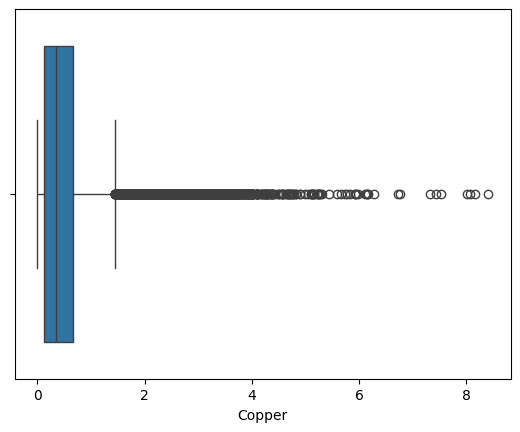

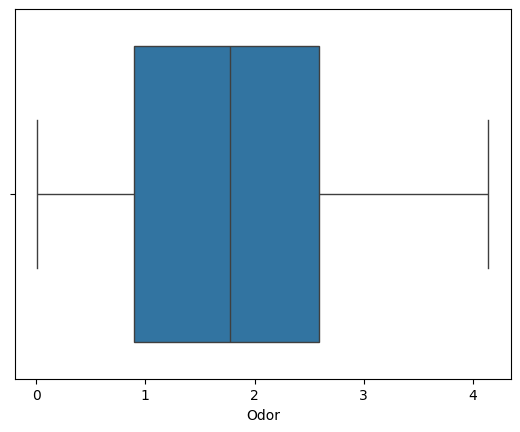

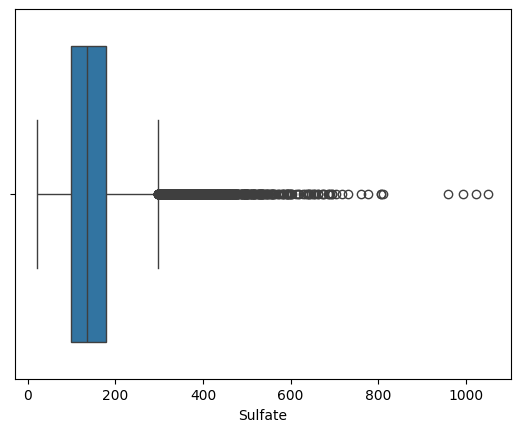

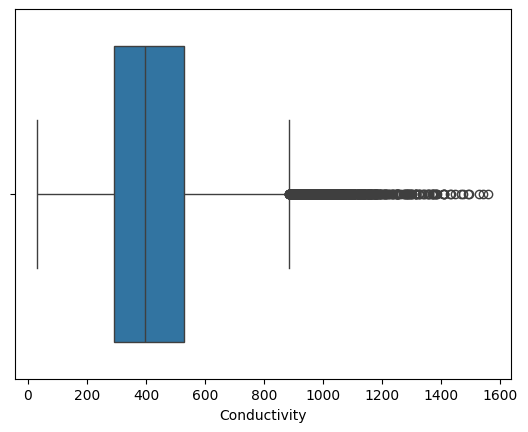

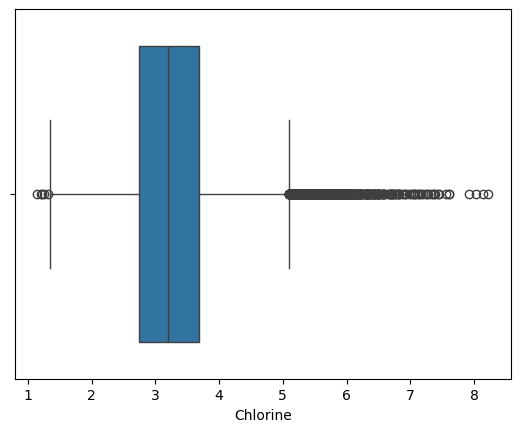

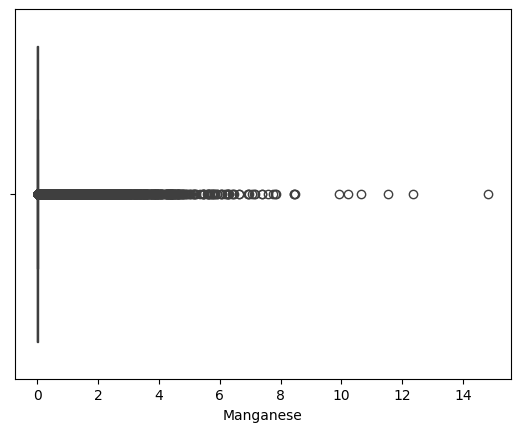

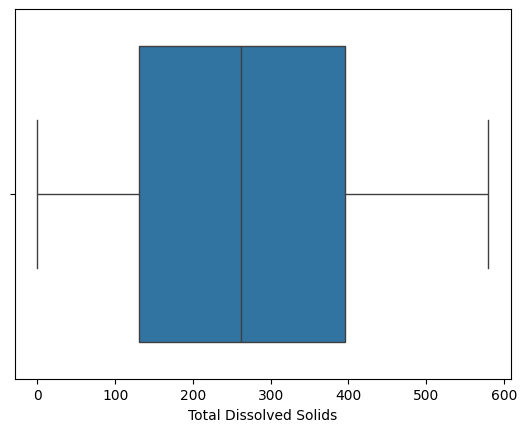

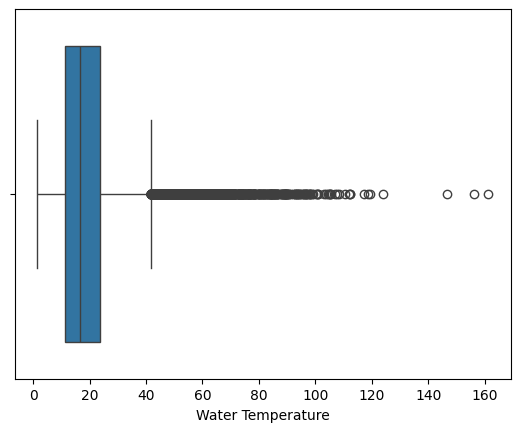

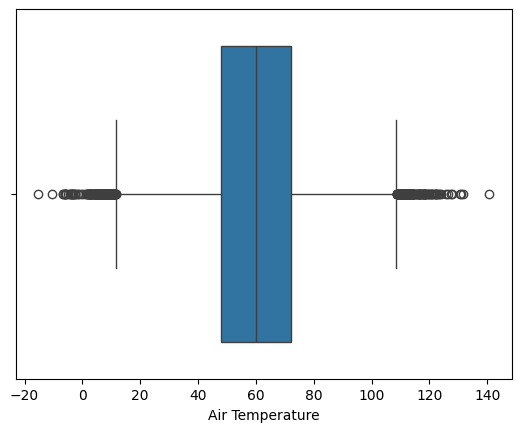

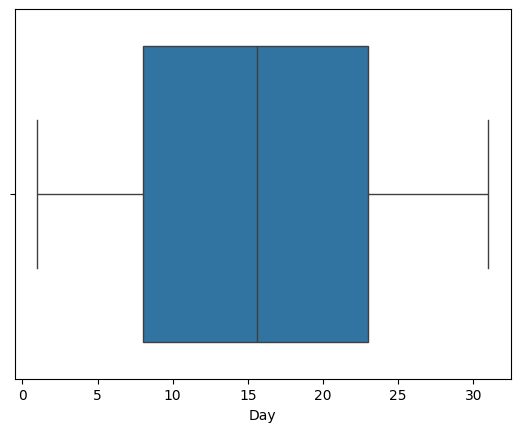

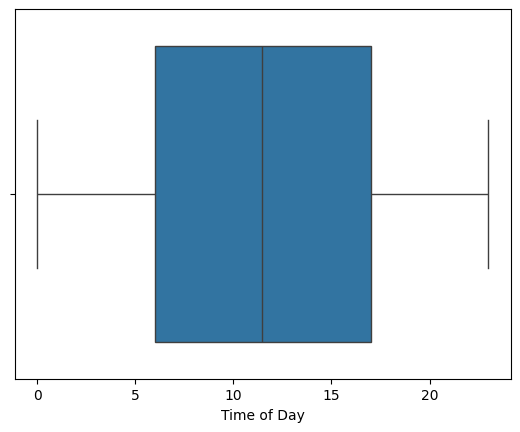

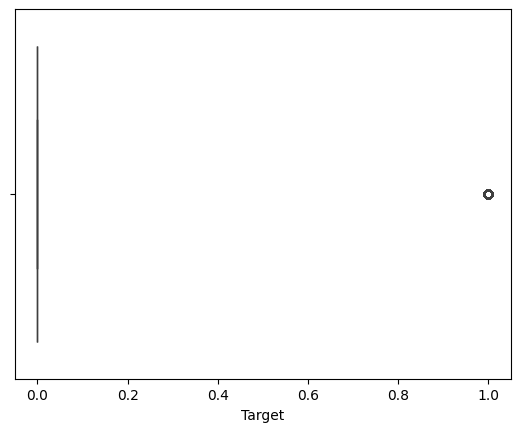

In [48]:
for i in dataset.select_dtypes(include="number").columns:
    sns.boxplot(data=dataset,x=i)
    plt.show()

In [49]:
dataset.isnull().sum()

,0
pH,0
Iron,0
Nitrate,0
Chloride,0
Lead,0
Zinc,0
Color,0
Turbidity,0
Fluoride,0
Copper,0


In [50]:
# Check for typos and ensure column names exist
print(dataset.columns)

# Drop columns (adjust column names if needed based on the output above)
dataset = dataset.drop(['Iron', 'Lead', 'Manganese'], axis=1, errors='ignore') # Use errors='ignore' to skip non-existent columns

Index(['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Color',
       'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity',
       'Chlorine', 'Manganese', 'Total Dissolved Solids', 'Source',
       'Water Temperature', 'Air Temperature', 'Month', 'Day', 'Time of Day',
       'Target'],
      dtype='object')


In [51]:
dataset.shape

(49961, 20)

In [52]:
from scipy.stats.mstats import winsorize
import numpy as np

numerical_cols = dataset.select_dtypes(include=np.number).columns.tolist()
for col in numerical_cols:
  if col not in ['Iron', 'Lead', 'Manganese', 'Target']:
    dataset[col] = winsorize(dataset[col], limits=[0.05, 0.05])

In [53]:
dataset.shape

(49961, 20)

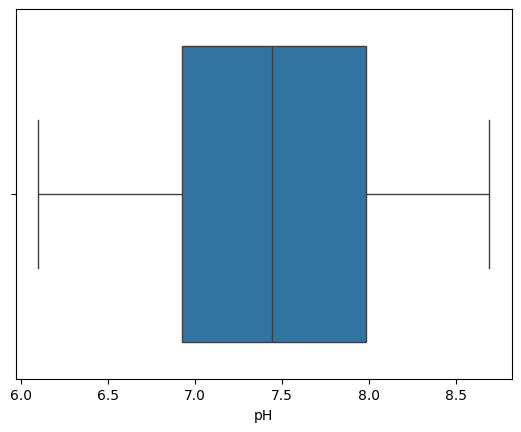

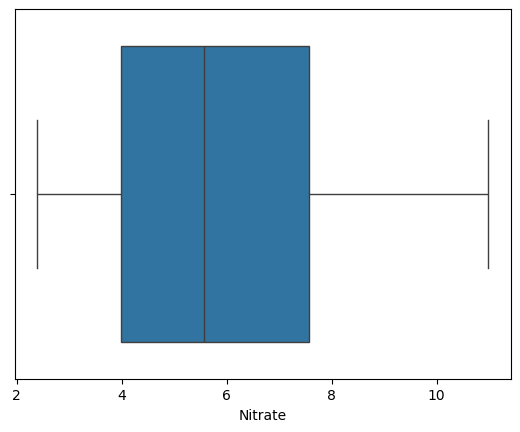

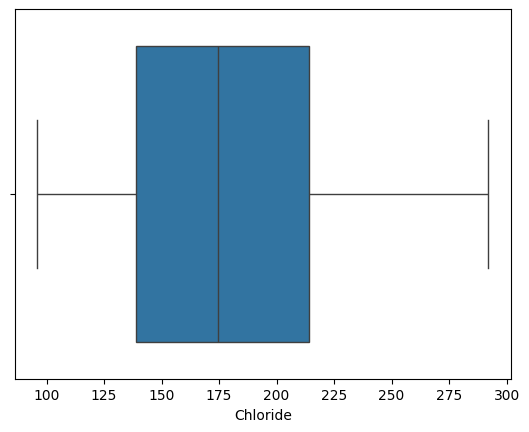

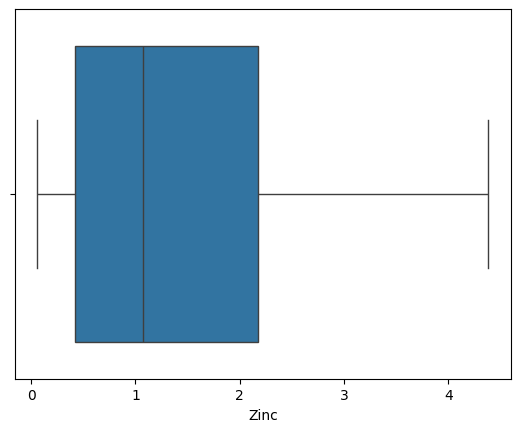

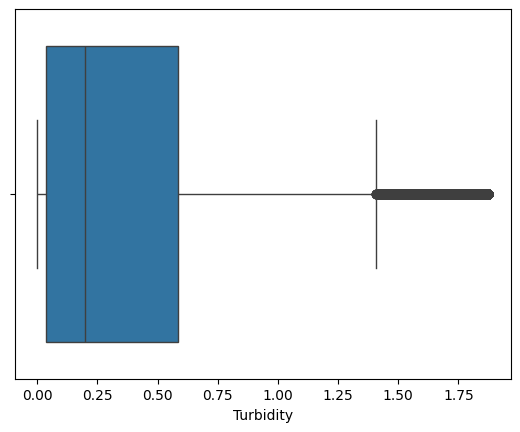

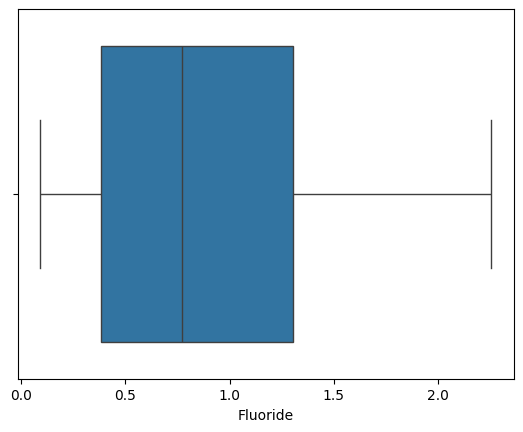

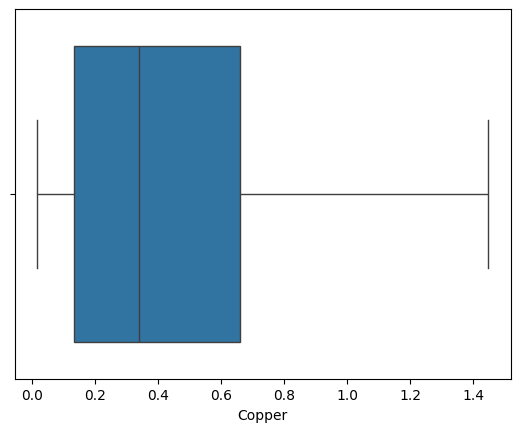

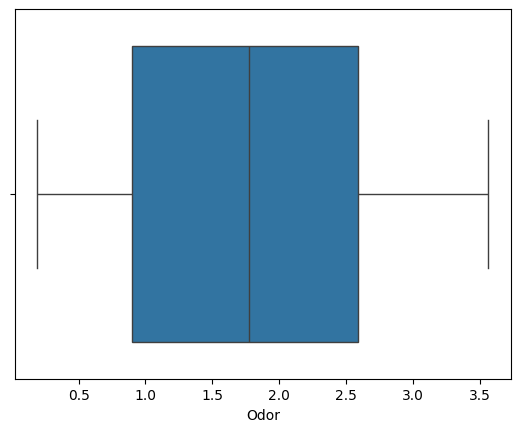

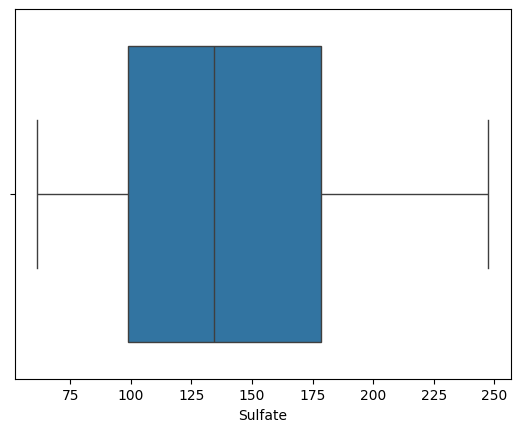

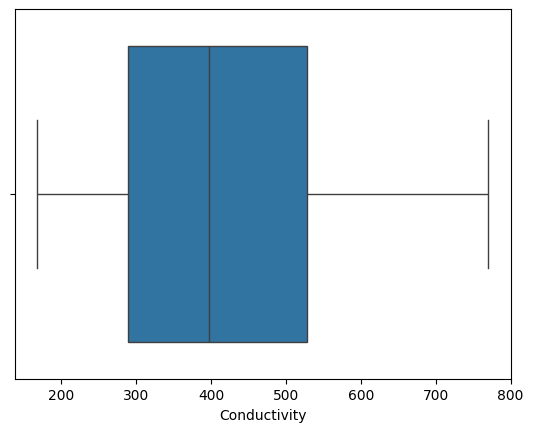

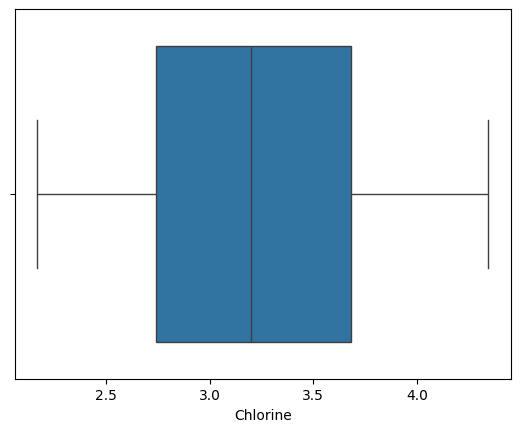

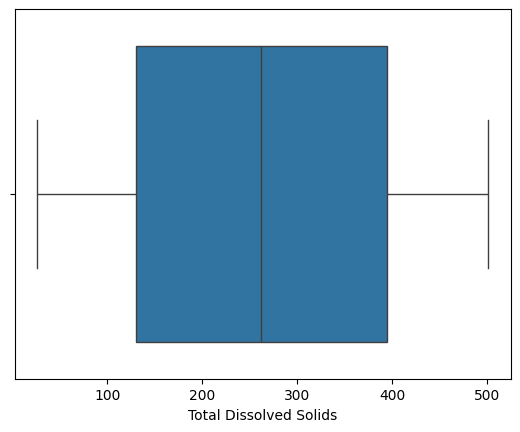

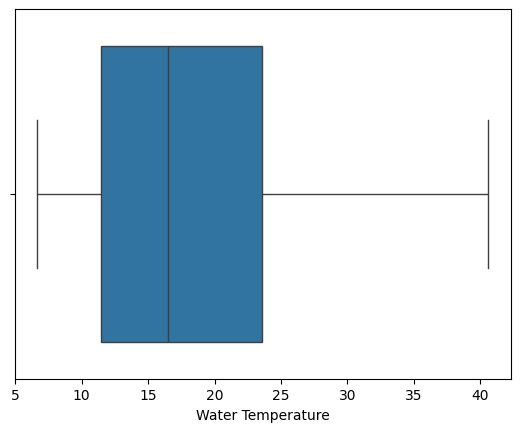

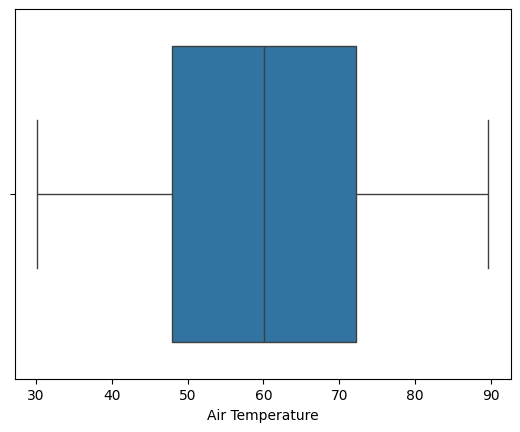

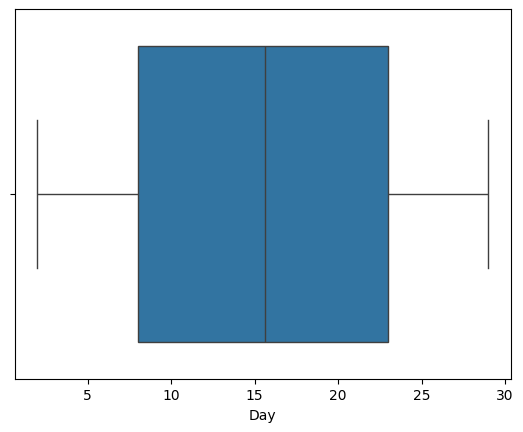

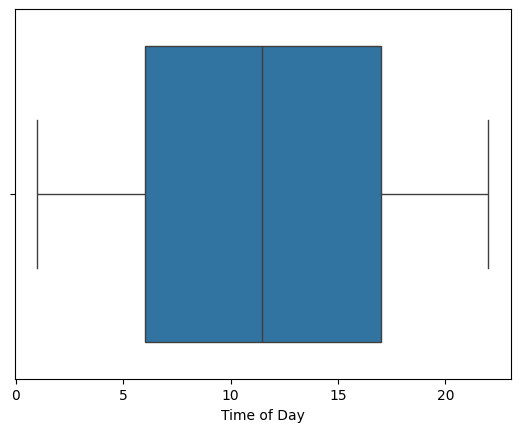

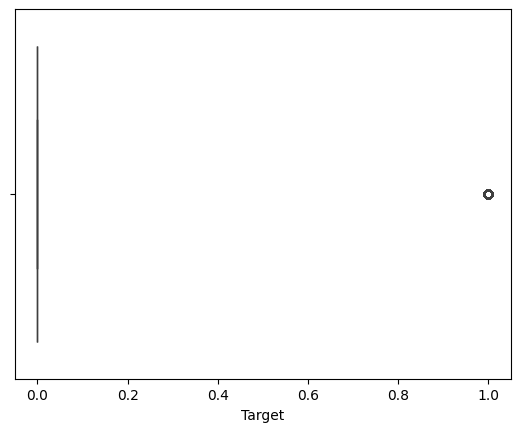

In [54]:
for i in dataset.select_dtypes(include="number").columns:
    sns.boxplot(data=dataset,x=i)
    plt.show()

In [58]:
!pip install scikit-learn

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'dataset' is your DataFrame
for column in dataset.select_dtypes(include='object').columns:
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])

In [59]:
dataset.to_csv('encoded_dataset.csv', index=False) # Save the DataFrame to a CSV file named 'encoded_dataset.csv'

!ls -l encoded_dataset.csv # List the file in the current directory to verify it exists

-rw-r--r-- 1 root root 9221530 Sep 25 09:21 encoded_dataset.csv


In [60]:
from google.colab import files # imports the files module from google.colab
files.download('encoded_dataset.csv') # downloads the file named 'encoded_dataset.csv'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE


# Initialize the model
rf = RandomForestClassifier()

# RFE for feature ranking
rfe = RFE(estimator=rf, n_features_to_select=10)
rfe = rfe.fit(dataset, dataset['Target']) # Changed 'data' to 'dataset'

# Get selected features
selected_features = dataset.columns[rfe.support_]

# Update dataset with selected features
dataset = dataset[selected_features] # Changed 'data' to 'dataset'

In [64]:
# Fit Random Forest to the data
rf.fit(dataset, dataset['Target'])

# Get feature importances
feature_importances = rf.feature_importances_

# Sort and display important features
sorted_idx = np.argsort(feature_importances)[::-1]
for index in sorted_idx:
    print(f"Feature: {dataset.columns[index]}, Importance: {feature_importances[index]}")


Feature: Target, Importance: 0.8235980025641633
Feature: Chloride, Importance: 0.03612804530841727
Feature: Turbidity, Importance: 0.035329193025024686
Feature: pH, Importance: 0.03391317645093742
Feature: Odor, Importance: 0.02486500361446721
Feature: Copper, Importance: 0.01967179735956148
Feature: Fluoride, Importance: 0.011316754724807488
Feature: Nitrate, Importance: 0.008896000194903659
Feature: Chlorine, Importance: 0.004770480979326435
Feature: Color, Importance: 0.0015115457783911076


In [65]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = dataset.drop('Target', axis=1)
y = dataset['Target']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced dataset
balanced_dataset = pd.concat([X_resampled, y_resampled], axis=1)

In [66]:
print(balanced_dataset['Target'].value_counts())

Target
0    38574
1    38574
Name: count, dtype: int64


In [67]:
balanced_dataset.shape[0]

77148

In [68]:
balanced_dataset.isnull().sum()

,0
pH,0
Nitrate,0
Chloride,0
Color,0
Turbidity,0
Fluoride,0
Copper,0
Odor,0
Chlorine,0
Target,0


In [69]:
balanced_dataset.duplicated().sum()

25

In [70]:
balanced_dataset.drop_duplicates(inplace=True)

In [71]:
balanced_dataset.duplicated().sum()

0

In [81]:
from google.colab import files

# Save the DataFrame to a csv file
balanced_dataset.to_csv('balanced_dataset.csv', index=False)

files.download('balanced_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    balanced_dataset.drop('Target', axis=1), balanced_dataset['Target'], test_size=0.3, random_state=42
)

# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

In [77]:
print(f"Training set shape: {X_train.shape}") # Print the shape of the training data (rows, columns)
print(f"Test set shape: {X_test.shape}") # Print the shape of the test data (rows, columns)

Training set shape: (53986, 9)
Test set shape: (23137, 9)


In [78]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy:  0.8702078921208454
              precision    recall  f1-score   support

           0       0.89      0.84      0.87     11493
           1       0.85      0.90      0.87     11644

    accuracy                           0.87     23137
   macro avg       0.87      0.87      0.87     23137
weighted avg       0.87      0.87      0.87     23137

